In [1]:
import pandas as pd
df_book = pd.read_csv('booksummaries.txt',delimiter='\t', header=None)
# Rename columns for better readability
df_book.columns = ['ID', 'URL', 'Title', 'Author', 'Publication_Date', 'Genres', 'Summary']
# Check for missing values
missing_values = df_book.isnull().sum()
print("Missing values:\n", missing_values)
# drop missing values but yoou can fill it with empthy string by fillna func which I didnt because I want to find the corrlation between Genres and Authors
df_book = df_book.dropna()
df_book.drop(['ID', 'URL'],axis = 1 , inplace = True)
df_book.head()

Missing values:
 ID                    0
URL                   0
Title                 0
Author               47
Publication_Date    325
Genres              213
Summary               0
dtype: int64


,Title,Author,Publication_Date,Genres,Summary
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."


In [2]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 1222
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             838 non-null    object
 1   Author            838 non-null    object
 2   Publication_Date  838 non-null    object
 3   Genres            838 non-null    object
 4   Summary           838 non-null    object
dtypes: object(5)
memory usage: 39.3+ KB


In [3]:
# Apply the cleaning function to the genres column
def clean_genres(genres):
    cleaned_genres = [genre.split(":")[1].strip().replace('"', '').replace("'", "").replace("})",'') for genre in genres.split(",") if genre]
    return f"({', '.join(cleaned_genres)})"


df_book['Genres'] = df_book['Genres'].apply(clean_genres)

In [4]:
df_book['Genres'] = df_book['Genres'].str.split(',')
df_book.head()

,Title,Author,Publication_Date,Genres,Summary
0,Animal Farm,George Orwell,1945-08-17,"[(Roman \u00e0 clef, Satire, Childrens liter...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"[(Science Fiction, Novella, Speculative fict...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"[(Existentialism, Fiction, Absurdist fiction...",The text of The Plague is divided into five p...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[(War novel, Roman \u00e0 clef})]","The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[(Childrens literature, Fantasy, Speculative...","Ged is a young boy on Gont, one of the larger..."


In [5]:
# removing punctuations such as ! ? {} ()
def remove_punctuation(lst):
    import string
    return [s.translate(str.maketrans('', '', string.punctuation)) for s in lst]

df_book['Genres'] = df_book['Genres'].apply(remove_punctuation)
df_book.head()

,Title,Author,Publication_Date,Genres,Summary
0,Animal Farm,George Orwell,1945-08-17,"[Roman u00e0 clef, Satire, Childrens literat...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative ficti...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction,...",The text of The Plague is divided into five p...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman u00e0 clef]","The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[Childrens literature, Fantasy, Speculative ...","Ged is a young boy on Gont, one of the larger..."


In [6]:
# removing duplicates
def remove_duplicates_ordered(lst):
    seen = set()
    return [x for x in lst if not (x in seen or seen.add(x))]

df_book['Genres'] = df_book['Genres'].apply(remove_duplicates_ordered)
df_book['Genres'] = df_book['Genres'].apply(lambda x: [item.strip() for item in x])   #removing whitespace

In [7]:
df_book.describe()

,Title,Author,Publication_Date,Genres,Summary
count,838,838,838,838,838
unique,838,416,413,373,838
top,The Regulators,Robert A. Heinlein,1995,"[Fiction, Novel]",The story takes place in the fictional town o...
freq,1,28,12,49,1


In [8]:
exploded_df = df_book.explode('Genres')
# Count the occurrences of each genre
genre_counts = exploded_df['Genres'].value_counts()
genre_counts[0:10]


,count
Genres,
Fiction,502
Speculative fiction,428
Science Fiction,277
Novel,247
Fantasy,168
Childrens literature,153
Mystery,59
Horror,48
Suspense,48


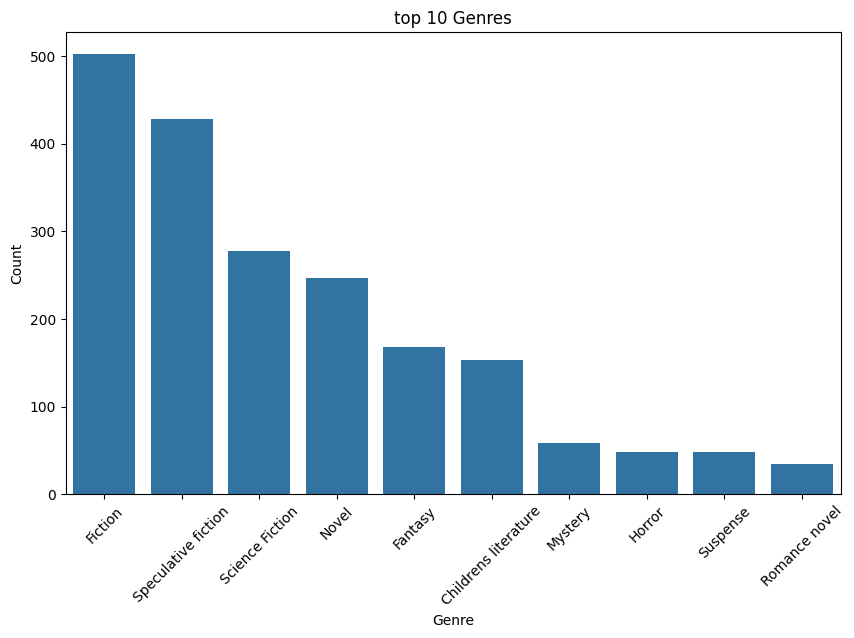

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot
plt.figure(figsize=(10, 6))
top_genre_count = genre_counts[0:10]
sns.barplot(x=top_genre_count.index, y=top_genre_count.values)
plt.title('top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
Author_count = df_book['Author'].value_counts()
Author_count

,count
Author,
Robert A. Heinlein,28
Stephen King,23
Isaac Asimov,19
Terry Pratchett,15
Iain Banks,15
...,...
Oscar Zeta Acosta,1
G. K. Chesterton,1
Scott Smith,1


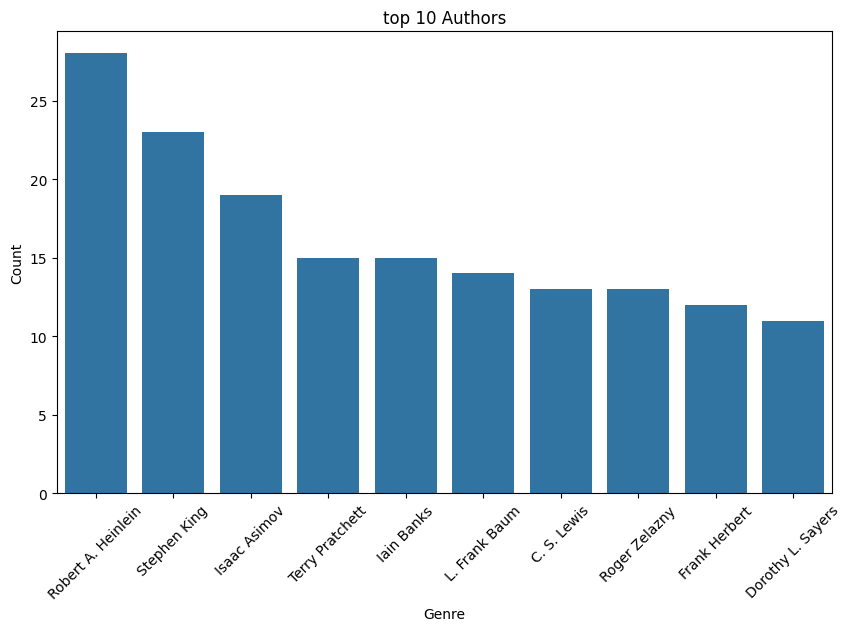

In [11]:
plt.figure(figsize=(10, 6))
top_author_count = Author_count[0:10]
sns.barplot(x=top_author_count.index, y=top_author_count.values)
plt.title('top 10 Authors')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
author_counts = df_book['Author'].value_counts()
top_authors = author_counts.nlargest(10).index.tolist()

# Filter DataFrame for top authors
top_authors_df = exploded_df[exploded_df['Author'].isin(top_authors)]

# Group by author and genre to get counts
author_genre_counts = top_authors_df.groupby(['Author', 'Genres']).size().reset_index(name='counts')

# Find genres with most publications for the top authors
most_common_genres_top_authors = author_genre_counts.groupby('Author')['Genres'].apply(list).reset_index()
print("Genres for Top Authors:\n", most_common_genres_top_authors)


Genres for Top Authors:
                Author                                             Genres
0         C. S. Lewis  [Childrens literature, Dystopia, Epistolary no...
1   Dorothy L. Sayers  [Detective fiction, Fiction, Locked room myste...
2       Frank Herbert  [Adventure novel, Childrens literature, Conspi...
3          Iain Banks  [Fantasy, Fiction, Mystery, Novel, Science Fic...
4        Isaac Asimov  [Childrens literature, Fantasy, Fiction, Myste...
5       L. Frank Baum  [Childrens literature, Fantasy, Speculative fi...
6  Robert A. Heinlein  [Childrens literature, Fantasy, Fiction, Novel...
7       Roger Zelazny  [Fantasy, Novel, Science Fiction, Speculative ...
8        Stephen King  [Apocalyptic and postapocalyptic fiction, Auto...
9     Terry Pratchett  [Childrens literature, Comedy, Fantasy, Fictio...


In [13]:
# Count occurrences of each genre in the original exploded DataFrame
genre_counts = exploded_df['Genres'].value_counts()
top_genres = genre_counts.nlargest(3).index.tolist()

# Filter genres from exploded DataFrame
top_genres_df = exploded_df[exploded_df['Genres'].isin(top_genres)]

# Group by genre and author to get which authors write the top genres
genre_author_counts = top_genres_df.groupby(['Genres', 'Author']).size().reset_index(name='counts')

print("Authors for Top Genres:\n", genre_author_counts)


Authors for Top Genres:
                   Genres                  Author  counts
0                Fiction             A. A. Milne       1
1                Fiction         Agatha Christie       1
2                Fiction              Al Franken       1
3                Fiction            Albert Camus       1
4                Fiction  Aleksandr Solzhenitsyn       2
..                   ...                     ...     ...
538  Speculative fiction          William Gibson       4
539  Speculative fiction         William Golding       1
540  Speculative fiction    William Peter Blatty       1
541  Speculative fiction    William R. Forstchen       1
542  Speculative fiction    William S. Burroughs       2

[543 rows x 3 columns]


In [14]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Load the model and tokenizer
model_name = 'facebook/bart-base'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def summarize_text(text):
    """Summarizes the input text using BART model with reduced quality for speed."""
    # Tokenize the input text with lower max_length
    inputs = tokenizer([text], max_length=512, return_tensors="pt", truncation=True).to(device)

    # Generate summary with reduced parameters
    summary_ids = model.generate(inputs['input_ids'], max_length=100, min_length=20, length_penalty=1.0, num_beams=2, early_stopping=False)

    # Decode the generated summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Apply the summarization to the Summary column
df_book['Summary'] = df_book['Summary'].apply(summarize_text)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [15]:
df_book.to_csv("df_book.csv", index=False)

In [5]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 67.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
import torch
from diffusers import StableDiffusionPipeline

# Load  DataFrame
df_result = pd.read_csv('df_book.csv')

# Load a smaller or faster Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4', torch_dtype=torch.float16)
pipe.to('cuda')  # Move to GPU for faster processing

# Function to convert text to image
def text_to_images(prompts):
    with torch.no_grad():
        images = pipe(prompts, num_inference_steps=20).images  # Batch processing
    return images

# Apply the text_to_image function to the specified column in batches
batch_size = 10
images = []

for i in range(0, len(df_result), batch_size):
    batch_prompts = df_result['Summary'].iloc[i:i + batch_size].tolist()
    images_batch = text_to_images(batch_prompts)  # Process the entire batch
    images.extend(images_batch)

# Assign images back to the DataFrame
df_result['image'] = images

df_result.to_csv('df_reult.csv',index=False)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (95 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the farm, renaming it " animal farm ". they adopt seven commandments of animal - ism <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '; and pete, who mostly plays along as the droogs indulge their taste for ultra - violence. <|endoftext|><|endoftext|><|endoftext|>', 'the spread of the bubonic plague. the

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['drade continues to develop her drastic, secret plan to overcome the honoring matres. the bene g <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'of an extensive forest in styria where she lives with her father, a wealthy english widower, retired from the austrian <|endoftext|><|endoftext|><|endoftext|>', 'the babies in an empty orphanage. he makes a point of maintaining an emotional distance from the orphans <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "english solicitor, journeying by train and carriage from england to count dracula's crumbling, remote castle ( sit <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'and the wavering of his mental faculties. in essence, he believes every word of these books of chivalry <|endoftext|><|endoftext|><|endoftext|>',

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a " pre - worm." his body has come to resemble a small version of the ancient sandworms from arrak <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'their secession from the united states ( the " union ") and formed the confederate states of america ( the " confederacy "), after abraham lincoln was elected president with no ballots', '), the accountant ( toying architecturally with dominoes ), and marlow ( <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '. a new civilization has risen, with three dominant powers : the ixians, whose no - ships are <|endoftext|><|endoftext|><|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sey who is friendly to john, parson glennie, the local clergyman who also teaches in the village school, <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'reality dataspace called the " matrix ". unemployable, addicted to drugs, and suicidal, case <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'is to hide the fact that allied intelligence has cracked the german enigma code. the detachment stages events, often behind enemy lines, that provide alternative', 'of branding. there is an actual clothing brand nologo which has existed since the late 1 9 8 0 s and can <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the unwilling colonists have fallen prey to a form of escapism involving the use of an illegal drug ( can - <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', am / fm radios 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["sus, a pierson's puppeteer, and offered one of three open positions on an exploration voyage beyond known space. speaker - <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "year 2 1 3 0 while still outside the orbit of jupiter. the object's speed ( 1 0 0 & nbsp ; 0 0 0 & nfty ;", "take care of his half - sisters ; however, john's selfish and greedy wife, fanny <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", ', featuring thousands of unfilled ecological niches. the other outstanding feature of lusitaania is the <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'young ( named after medal of honor winner rodger wilton young ), serving wit

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['him : he lost his teaching position at a vermont prep school after assaulting a student. jack eagerly accepts a job as a winter care <|endoftext|><|endoftext|>', 'explains that the basketerville family is afflicted by a curse. according to an old account, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the idea, but bilbo, indignant, joins despite himself. the group travel into the wild, where gand <|endoftext|><|endoftext|><|endoftext|>', 'they travel. when the bus reaches its destination, the passengers on the bus & mdash ; including <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'mentor to wormwood, the inexperienced tempter. in the body of the thirty - one letters which make up the book <|endoftext|><|endoftext|><|endoftext|>', 'death and finds himself in a pit

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['painted would grow old in his place. under the influence of lord henry ( who relishes the he <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'lies beyond our horizons, perhaps to the technology of para - physical forces." the narrator notes that for millions of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'monks, who implacably oppose the plan. morgan is approached by a mars - based consortium to develop a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "to one area. ralph emerges as one of the survivors'leaders during the meeting, as does jack <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'wall - hung mirror behind the fireplace and discovers, to her surprise, that she is able <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and unfriendly. he demands to be left alone and spends most of his time in his rooms <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'marine biologist and narrator of the story, who happens to be in new new york at the time and is a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "background in which the inherited wealth has now become dissipated, gordon resents having to work for a living. the'war'( and", 'pdp - 1 1 / 4 0 with rk - 0 5 disk drive, lp - 1 1 line printer interface, pcl - 1 1 paper', "us closer to death and is the ultimate enemy ; people live as if they didn 't know about the certainty of death <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'in fullerton, the allens, to accompany them to visit the town of 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meet their old neighbor, muley graves, who tells them that the family has gone to stay at <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'and his father are miners ; after the eldest brother, ivor, is killed in an mining accident, hu <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'unify these chapters : a series of dreams about red - haired twin sisters, and the fact that a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', gulliver is washed ashore after a shipwreck and finds himself a prisoner of a race of tiny people, less than 6 inches <|endoftext|><|endoftext|>', 'celies has a second child, a boy, whom she father also abducts. celina ’ s mother becomes <|endoftext|><|endoftext|><|endoftext|>', ', whom he has chosen for her. in response, egesus quotes before theseus an ancient at

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['several other members of the crew are eventually acquitted. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '0, 0 0 0 american civilians as punishment. the laboratory is in turmoil as the novel begins. all but six of the personnel have <|endoftext|>', 'all his days in, on and close by the river. rat takes mole for a ride in his rowing <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'ish away, and never be met with again. with this in mind, they split up to hunt. along the <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'he leads an idyllic life. one day, jonathan is met by two gulls who take <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["for everything that occurs, and her permission is consistently sought. at the beginning of the story, o's lover, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "one day, causes substantial property damage across the city of westville. john's mother wants him to get rid <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", ', and his secretary. bond is briefed that strangway had been investigating the activities of dr. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["stolen copy of an interactive book, young lady's illustrated primer : a propædeutic <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'story is told in the context of the feast of the fools. the king of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'for her to fit through, but through it she sees an attractive garden. she then discovers a bottle on a table <|endoftext|><|endoftext|><|endoftext|>', 'of tijuana fur & dye. using an extraterrestrial am <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endofte

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the culture of the martian natives, who possess full control over their minds and bodies ( learned skills which <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'are you a coward?". he settles on the latter. he receives a letter from a mysterious woman <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the " warden ") holds power, in practice there is little intervention in the loose lunar society. holm <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the sea remains so strong that he sets out to sea again. this journey, too, ends in disaster as the ship is taken over', 'and only critic is the gentlemanly george knightley, her neighbour from the adjacent estate of donwell, and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'joe often narrates stories to him about the chocolate factory and about its mysterious proprietor, and the mysteries relating <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'they live at green gables, their avonlea farmhouse on prince edward <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ". frank believ

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['be announced by banns in advance. due to lack of money, clo and juliet <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'regime is largely confined to university campuses, where radicalized former university students eke out a desperate existence <|endoftext|><|endoftext|><|endoftext|>', 'back to kansas as dishwasher and waitress. whenever they manage to make some progress, an inconveniently timed <|endoftext|><|endoftext|><|endoftext|>', "' mayflower. on the journey, bill saves his bunkmates from asphyxiation by <|endoftext|><|endoftext|><|endoftext|>", '. the novel is set in a complex, balkanized world, and friday is caught up in several <|endoftext|><|endoftext|>', 'determination, kip puts the suit ( which he dubs " oscar ") back into working condition <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'encounters one of the adult 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of no use to the empire. hari then meets reporter chetter hummin <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "of foundation's edge to embrace the all - encompassing supermind of galaxia. first <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'as a reverse arabian nights scenario ) will consent not to end his life as long as his companions will listen <|endoftext|><|endoftext|>', 'grandmother hazel stone. while on mars in the twins buy their brother buster a native martian creature <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'control. dan\'s only friend in the world is his cat, " petronius the arbiter ", or <|endoftext|>', "the group, along with joe ( the family's african american servant ), retreat to the fallout shelter below <|endoftext|><|endoftext|><|endoftext|>", ". polhaus about archer

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. they run their lives according to a collection of beliefs and rituals " revealed " to salvador after he <|endoftext|><|endoftext|>', '. vera faints and mrs. thomas scolds bigger, who hates his family because they suffer <|endoftext|><|endoftext|><|endoftext|>', 'milan over the summer. henry falls in love with catherine and, by the time he is healed, catherine <|endoftext|>', 'to - door on the side. within a year, her father and pullman <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'become an minister, is manipulated into marrying christina, the daughter of a clergyman ; the main <|endoftext|>', "'s house to see what mildred will wear to a dance that evening. after alice's return, <|endoftext|><|endoftext|>", 'having already paid his debt to society by serving his time in prison. rejected by innkeepers, who do not', 'the real novel be

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [". lennie's part of the dream is merely to tend to ( and touch ) soft rabbits on the farm. <|endoftext|><|endoftext|><|endoftext|>", 'an adolescent during the counterculture movement of the 1 9 6 0 s. however, he responds to the ad anyway and, upon', "stone's sister jane, who moves into the house soon afterwards. murdstone thrashes david for falling behind in his <|endoftext|><|endoftext|>", ". after one week, the aliens announce they are assuming supervision of international affairs to prevent humanity's extinction. as the overlords <|endoftext|>", 'omir had tried to take the ring from him and that he truly regretted his actions. in <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "omir, denethan's dead son and preferred heir. now clad in the uniform of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoft

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the topeka railway station, which to their surprise is located in the top topeka, kansas, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'path of the beam inland to mid - world, and roland now reveals to his ka - tet <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'destroy the kingdom of delains, sees his plans being ruined by the good heart of queen sasha <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'a shortcut, she slips and falls down a steep embankment and ends up hopelessly lost, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the floor\'s linoleum. th

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', the warrens military caste. the travelling group of rabbits find themselves following the leadership of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'dedicates her life to her future. she follows an afternoon " spy route " during which she <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "rusty regan, who has disappeared. on marlowee's way out, vivian <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "of that novel's characters, diziet sma. here, sm <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'drone friends, mawhrin - skel, which had been ejected from special circ <|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tragedy fits in with, and adds to, the gloomy atmosphere created in the novel. egged on by andrea, <|endoftext|><|endoftext|><|endoftext|>', "being in his room in the family ’' s country home in combray, while downstairs his parents entertain <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'the hill of alderley. the caves were sealed by powerful white magic which would both defend fundind <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'as they have never shown up in his seminar, he asks : " do they exist or are they spooks <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'iously vanish while climbing the rock. no reason for their disappearance is ever given, and one of the missing girls who is later', '" & mdashes ; specialising in both prostitution and drug - trafficking. the brains of the " out <|endoftext|><|endoftext|><|endoftext|>', "spring ter

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['technological background, due partly to an exodus by much of the species, and partly to the fact that those who remained ( or <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'looking through an electron microscope. the seventh, found before the event of the book by the lady sharrow and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'is where their daughter, esther, was born in 1 9 5 0. in 1 9 5 1 the family emigrated to melbourne, australia. when the novel', '. " the flower - show match," an account of an annual village cricket match - an important fixture for <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '’ s maid e

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['spends smoking, watching tv, listening to albums and looking for temporary female companionship. after a pleasant relationship with a <|endoftext|><|endoftext|>', 'of the state requiring little more than wedding vows to be recited while a magistrate is in the room for <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'in two dimensions. the square has a dream about a visit to a one - dimensional world ( lineland ) <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', robert clapley, plans to bulldoze the island and turn it into shearwater island, with high <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'ate the king at the coronations. the unconscious king is abducted and imprisoned in a castle in the small <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'house next to the mansion of gatsby, the mysterious host of regular, extravagan

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['rainy day she discovers a locked door in the drawing room, which has been bricked up. as she goes to <|endoftext|>', ". louis is approached by a vampire named lestat, who desires louis'company. lestats turns louis into a vampire", "what appears to be a sunburn on the body's arm. to his surprise, the case draws the attention of the highest", 'practice, however, is to indicate book number in roman numerals, and chapter title in arabic, so that <|endoftext|><|endoftext|>', '6 - st - old mary, and 1 7 - year <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "sammy was working as a copy boy at manheim's newspaper. both awed and disturbed

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. john travels to ilium, new york, to interview the hoenickker children and others for his <|endoftext|><|endoftext|>', "mildred's life grows more exciting with the arrival of new neighbours, anthropologist helena napier and her handsome, d <|endoftext|>", "to be beaten for his romantic interest in the marquise'daughter, with the unintended consequence of the marqui and", 'celluses ends up carrying out the crucifixions of jesus, but is troubled since he believes jesus <|endoftext|><|endoftext|><|endoftext|>', 'the countryside around the dutch settlement of tarry town ( historical tarrytown, new york ), in <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', beginning with a plan to assassinate the greek premier, karolides, during his forthcoming visit to london. <|endoftext|>', 'only ; makes sense.") and sees him described as a drug and booze fuelled, sexually promiscuous party

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['on achilles, take over his network, and then turn achilles over to some country for trial ( at the time <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "for two stand - up comedians on an interplanetary comedy circuit. most of the action in the novel follows this trio's <|endoftext|><|endoftext|><|endoftext|>", 'which the authorities hope will discredit his views on the continu of the war. rivers states that he feels <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'ant discovers a manuscript written by zampanchò that turns out to be an academic <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the second chapter goes back to when jurgus and ona were in lithuania before they married and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '& n ; 7. it later emerges that the orders given have been wholly automatic, and the war has taken place as a', 'power, whether republican or princely ". the way in which the word state came to acquire this modern type <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'deputies burst into the cabin and arrest the father. sounder runs after them, and one of the deputies shoots him. <|endoftext|><|endoftext|>', ', it takes up orbit around the semi - habitable moon, erythro, named for the red light <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', along with a male filipino transvestite navigator and a talking fruit bat. there <|endoftext|><|endoftext|><|endoftex

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and korean war veteran whose own foray into public life was a run for the florida state legislature <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'spoiled manner. they exchange contact information, but upon discovering the " steady round of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'with his eccentric siblings — sister rose and brothers porter and charles — whose odd habits include alphabetizing the groceries <|endoftext|><|endoftext|><|endoftext|>', 'which, as biff points out, is the original hebrew version of the hellenized " jesus ", <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'coincides with stevens having the opportunity to revisit this once - cherished relationship, if only under the <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endof

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is initially mystified, because lent has just begun, but his confusion <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'he is forced into numerous and risky sexual encounters ; his only rule is that he never pays for sex - a rule <|endoftext|><|endoftext|>', 'to wait until he is more established. rosemary and guy are quickly welcomed by minnie and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'imagining what career he might pick if he had the choice. chip is told by his adviser that " picking " and <|endoftext|><|endoftext|>', 'claims he has just finished eavesdropping on the so - called " angel of death," dr. josef mengele, the', 'single day to change these hairs from a jetty black to white, to weaken my limbs, and to un <|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['almost any point of their choice, apart from a section of the far future which they cannot enter. collectively <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'cousin barnes newcome. col. newcome goes out to india for decades, then returns to england where clive meets his cousin e', '. as he died, his father had given arthur a mysterious watch, murmuring, " your mother." naturally arthur <|endoftext|><|endoftext|>', 'as a horse ), he becomes a respected member of the tribe. es : un hombre llam <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'lilia had already married the italian and becomes pregnant again. while giving birth to her son <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'unsure of who omar and his father is as the three sisters got pregnant at a house party. w

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in tears, " i will go with you, but i won \'t leave you." but in the middle of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '8 to 1 6 4 8 ). the novel takes place over five months, november to march. four wealthy libertines lock themselves in a castle <|endoftext|>', 'during the napoleonic wars. the novel begins in july 1 8 0 5 in saint petersburg, at a soirée given <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'egypt. because the aircraft used in these attacks were obtained from the soviet union, the soviets were mistakenly blamed, triggering a retaliatory', 'on his political influence to win various personal favors. his greatest ally and his greatest adversary is clor

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [". cathcart was killed by a bullet from denver's revolver, and denver's only alibi is <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "the patient's great - niece - popular locally - had nursed her through her illness and was the intended he <|endoftext|><|endoftext|><|endoftext|>", "nearly all of the money will go to ann dorland, a distant relative of lady dereer's late husband. <|endoftext|><|endoftext|>", 'year later he proposed, and harriet, outraged at being deceived into giving up her public honour, broke off the relationship <|endoftext|>', 'wimsey, who is in the region on a fishing holiday, points out the inconsistency which makes it impossible for campbell himself', 'can fetch help. lord peter arrives, and he an

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. a few days afterwards, harry is visited by a group of wizards and mad - eye moody and is whisk <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'place in one of these, its effects may propagate so that it leads to the utterance of one <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', these submarines undertake the most hazardous, stressful mission conceivable, and of late, the missions have been failing, with', 'the book tells the story of the seventh attempt in a series of experiments to create an artificial consciousness. for each attempt the scientists raise <|endoftext|>', 'that no thought could be given to the effects, the sentients of the galaxy found the need for a bureau of <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'is the glue that holds the far - flung consentience together. unfortunately, one consequence of jump - doo

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in spite of his early abandonment. indeed, he is due to wed the daughter of his boss, and live wealthily', 'va "), a moscow aristocrat and civil servant who has been unfaithful to his wife darya alexandrovna, (" dolly', ", sets about getting in touch with the former girlfriends. eventually, rob's re - examination of his <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'the head. mark ableton has disappeared, so tony gillingham, a stranger who has just arrived to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'away from duddits, but maintain close bonds with each other, sharing memories of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'this satirical intellectual game " the plan ". as belbo\'s friends beco

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['which is referred to as " year omega ". in 1 9 9 4, the sperm counts of human males plummeted to zero and mankind now faces imminent extinction', 'leamas is recalled to the circus in london by control, chief of the circus. there, control asks <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'american doctor. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['mrs proudie is an undue influence over the new bishop, making herself as well as the bishop unpopular with <|endoftext|><|endoftext|>', "make enough money to pay milly's extravagances, he accepts the offer. because he has no <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'lan has an older brother who has been living in [[ united states for a few years. he has a friend <|endoftext|>', "'s records ( for madmen only ). as it begins, the hero is beset by reflections on his being ill - su", 'briefly met and gambled with in casino royale ), to watch auric <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ", whom he killed in the past. the book features characters that return in some of kennedy's other books <|endoftext|><|endoftext|><|endoftext|>", 'to 1 8 months. fellow patients polly,

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['house in brooklyn, where he hopes to devote some months to his writing. while he is working on his novel, he <|endoftext|>', 'cynical former british officer in his early forties, who leaves the service under a cloud, turns landscape painter and cultivates an', 'supporting the terrorists ), england ( for oppressing the irish and giving them a cause ), and libya ( for training said terrorists <|endoftext|><|endoftext|>', 'from his reading " the book in his hand," ( the bible ). this burden, which would cause him <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'lifestyle. adding an element of danger, the last few psychologists sent in have all died in accidents <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the anatomy is filled with more or less pertinent references to the works of others. a competent latinist, <|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['drives through the tollroadoth in his toy car, and instantly finds himself on <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'ping out the government debt. the dogs consider the humans their pets, but allow <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'exceptionally accurate indicator of violent sociopathy. professor phelin developed an imaging device called l. o. m. b. <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'couple, delaney and kyra mossbacher, have recently moved into a gated community on top of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'to fit their location, materi

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["robin wood ). the setting is loosely based on medieval england, and in places it incorporates white's considerable knowledge of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'connected to the ansible is being shut down. if she is to survive, she must find a way to transfer her a <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'he gains his freedom, becomes a christian and is commissioned to create an outer covering for the cup jesus drank <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'as " slaughterhouse number 5." during the bombing, the pows and german guards alike hide in a deep <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'on the saturday afternoon of the traditional football game with school rival, saxon hall. holden misses the game <|endoftext|><|endoft

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in a single room, the careful reader or child will notice numerous details from page to page, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'series of genetically programmed steps in preparing for egg laying. if an experimenter interrupts one of these <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'pom - poms causing them to sneeeze, pouring bubble bath liquid in <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'earlier short story " lady in the tower " * talent level : t - 1 telekin <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the illness of his wealthy aunt, " grandmother ", he sends streams of telegrams to moscow and awaits the news <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'disorient her. she appreciates the witty sarcasm and adventurousness of her friend doreen, but also identifies <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'threats to democracy and possible dangers of democracy. these include his belief that democracy has a tendency to degener <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the community throughout adulthood, jonas is selected for a role as the receiver of memory, the keeper of all ancient memories in the <|endoftext|>', 'of her. his idea of being close to his daughter consists in his nocturnal visits to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'by the only oth

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['has earned him the nickname alp - öhi (" alm uncle " in the graub <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'agreed to but the college warden wants to back out of the deal. the sub - <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'several years before. louise is a devout catholic. scabie is passed over for promotion to commissioner <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', it had unforeseeable side effects due to the unprecedented duration of its use. their intelligence and reasoning skill are damaged. <|endoftext|>', 'of richard nixon in 1 9 7 4. there is a filmed account of an alternate universe nixon, " ferris freemont " and his', 'actionary pre - marx

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['to explore the wonders of the universe. the story begins with a message from a man named levain, <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'to his widowed sister - in - law and her daughters isabella (" bell ") and lilian <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'society. he is soon preyed upon by local member of parliament mr sowerby to guarantee a substantial <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'a duel by each of three musketeers ( athos, aramis <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['kishimi, an isolated, evacuated island southwest of shodoshima ( modeled after the island of ogijima ).', "the eye of sir thomas ’' s wife, lady booby, who employed him ( now seventeen <|endoftext|><|endoftext|>", "first with her to brighton, where he meets one of his aunt's old acquaintances, and gains an <|endoftext|>", 'reason on her. after her father resorts to force to stop her from attending the ball, she leaves her <|endoftext|><|endoftext|>', ', a scotsman, who joins their party. after various romantic interludes, humphries suffers false imprisonment but <|endoftext|>', 'faulkner uses italics to indicate points in each section where the narrative is moving into a significant moment in <|endoftext|><|endoftext|><|endoftext|>', 'whom he sees lose all her winnings in a game of roulette. the next day, gwendomen receives <|endoftext|><|endoftext|>', 'sister, evelyn flaumel. he fl

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['pattern, ganelon runs through the stain to the center and retrieves the objects - a dagger, and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "and the arm disappear, and corwin and random are released. corwin learns from martin's trumps <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'akeen, has vague memories of a place or time that is no longer accessible from the road. he runs <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'electronics to mutate their minds and create enhan

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of the world council was to eliminate all individualist ideas. it was so stressed, that people were burned at the stake for saying <|endoftext|><|endoftext|><|endoftext|>', 'states air force f - 1 0 5 pilot, shot down along with his back - seater john t <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'on a business trip to boston and new york. we are then introduced to the blue - collar cambers, longtime town <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'wer and he never marries the love of his life, clara. although he <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["anged past against him to keep ender exiled on another planet so that the world's leaders won 't be tempted to fight over his military genius. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "'s sword and shield, susan's bow and arrows, and lu's bottle of magical cordial <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'and discovers a doorway to a magical world named narnia. there she meets a faun named mr tumnus. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|end

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['off and traveled the lengthy corridors searching for cheese. one day both groups happen upon a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'women on the island ( she is well educated and has a lot of respect from her father ), who <|endoftext|><|endoftext|><|endoftext|>', "a handyman and entertainer, performing with his pet bear, state o'maine ; freud comes to symbol <|endoftext|><|endoftext|>", '’ ve had a sub - contract on, and, further away, the lights of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'dons the chain and leaves the cave to search for the woman who led him there, only to find her in <|endoftext|>', 'is fleeing for her life for her alleged connection to the events in perdida street station. <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'causes her to inflate, and is picked up by the knight bus, but only after an

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['age. as the story opens, while strolling outside a cemetery, he sees a coarse - looking red - haired foreigner <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'local aristocracy and therefore miserably unhappy, effi finds but one companion in the whole town. she suspects that their <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'have labeled de gaulole a traitor to france after his grant of independence to algeria. the french <|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and discovers her mother has made a plaster of paris model of carly beth's head. on halloween day, <|endoftext|><|endoftext|><|endoftext|>", '". the story of the little engine has been told and retold many times. the underlying theme is the same & <|endoftext|>', 'police, in search of his next fix. there are short chapters here describing the different characters he travels <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the first proposal. after dinner with some blue ant employees, the company founder hubertus bigend offers cayce a', 'sins. the society that has survived in labrador is loosely reminiscent of the american frontier during the 1 8 th century <|endoftext|>', 'from the ancient ice, which the researchers believe was searching for heat when it was frozen. thawing rev <|endoftext|><|endoftext|><|endoftext|>', 'tea party. <|endoftext|><|endoftext|><|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', and his conflicts with rival pat brady, a character based on studio head louis b. mayer. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the novel is a chronological narrative of four periods in the lives of alabama and david knight, names that are <|endoftext|><|endoftext|><|endoftext|>', 'they have been tempted to him with balloons. because most children think a monster would eat them, it takes away <|endoftext|><|endoftext|><|endoftext|>', 'eating the waste from the rubbish tip behind unseen university ; maurice gained it after eating one of the rats <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'of cloud computing power and memory which is distributed internationally and is traded in a public market called the qips exchange ( qips', 'feegle, nine - year - old tiffany aching finds out that her grandmother used to be <|endoftext|><|endo

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['red lightning tong criminal organisation from macau. when bond learns of the tong connection, lippe tries <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'adultery that she has committed and it is to be a symbol of her sin — a badge <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'cracking " and humorous tale of murder in a burlesquare house, and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'vacation with the maharaja of gaipajama. then one day a chinese man comes to meet <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'a poet in london. whilst the mother explores sufism and quests for personal fulfilment, the <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["the service learns that after destroying blofeld's castle in japan and bond suffered a head <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'found on the crime scene, indicates his murder was a way of “ censoring <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'puses and everyone inside finds themselves wearing scuba diving outfits. once this occurs, the school rises up into <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '. frizz of the planet in the sky, and the kids decide to take a bus to the asteroid belt. <|endoftext|><|endoftext|>', 'a home with an old woman but her cat and hen tease him mercilessly and again he sets off on his <|endoftext|><|endoftext|><|endoftext|>', '. he easily supplies the four necessities of life ( food, shelter, clothing, and fue

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['as flesher and gleisner time. early on, yatim and a friend, inosh <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the experiments unexpectedly create a bubble of something more stable than ordinary vacuum, dubbed novo - vacuum, that expands <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'an extraordinary letter from the south of france : " for god\'s sake, come!" writes monsieur <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ', as well as their meetings in bardo between their lives. the book features muslim, chinese ( buddhist, daoist <|endoftext|>', 'philby drafts a memorandum for the general secretary ( soviet president ) stating that, if the labour party wins the next general election', "is killed by one of spiro's staff. however, artemis manages to revive him with the aid of <|e

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', her mother also dies, it falls upon palatina to raise her two remaining siblings, caesar and helen <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'of a violent rampage. kilgoret arrives in midland, and, by happen <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'politically apathetic, caring only for his art and his wife helga, who is also the starring actress in all of his plays', ". dennett's stance on free will is compatibilism with an evolutionary twist & ndash ; the view <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'of the two squads. not long after the establishment of rainbow, a bank in bern, switzerland <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'problems including rape and eventually returned to the position of a health p

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['each of them a member of the two families, who are promoting their own opinion and views of the several complications that arise throughout the novel, including <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'dealing cars and driving an old taxi, economic survival in the city is getting harder by the day. it <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'highly educated, healthy and fit. training is gruellingfirst on earth, in missouri, and later on charon <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "exposed and in the open. after some 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['priest, survives to return to earth, and he is damaged physically and psychologically. the story is told in framed flashback, with chapters alternating between', "gir's presence, the family's life begins to deteriorate, and decay creep into it. as <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'are his younger sister, virginia du pre (" aunt jenny " or " miss jenny "), his son bay <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '. bitt as a middle - aged man, " nimble in the calling of selling houses for more than people <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'friends with a stoker who is about to be dismissed from his job. karl identifies with the stoker and d

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['chapter describes the same events as the first. one is then induced to read the book again, which becomes a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'ly & mdash ; who " detest [ s ] murder, unless absolutely necessary <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'clyde enjoys his new lifestyle and does everything in his power to win the affections of the flirtatious hortense <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'thugs. al capon pays the two, ordering the second one to eliminate tintins. however snowy knocks a <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'bay, an elderly gentleman wearing a

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the perpetual twilight of the afterlife. accompanied by three wizards, two dragons in human <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'versary " – the government of the united states. the protagonist is one of these warlocks. known as <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'nick begin a passionate affair with sadomasochistic qualities ( when they first embrace, frank commands frank <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'becomes homeless, renounces all personal possessions, and intensely meditates, eventually seeking and personally speaking with gotama <|endoftext|><|endoftext|>', "a message that summarizes the general's doings, and escapes to trantor, trying to see the emperor <|endoftext|><|endoftext|>", "wizard's staff on to his successor. however, the newborn child is ac

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['plebe year. the third focuses on the main body of his senior year and his conflict with the pleb system. the fourth and', 'cottage, the home of a woman and her mentally subnormal son, harry. the anxious woman thinks r <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'all kingdoms, to meet the most beautiful woman who ever existed, and to live forever. he is disappointed when <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "to earth to be pilloried as a sign of man's displeasure with his arrogance, and finally to titan where he <|endoftext|>", 'northern virginia at the battle of antietam, after which it returned to virginia. in how few remain, the orders are instead recovered', 'venus ), where is located a new garden of eden and a new adam and eve, to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["battlefield. the book's shift in tone from light - hearted romp to bleak desolation has bothered okoy <|endoftext|><|endoftext|><|endoftext|>", 'gameshs\'s posthumous adventures in the underworld, including the award - winning novella " gilgames <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "in the film return to oz, who is much perturbed by her guardians'doubts. later, it <|endoftext|><|endoftext|><|endoftext|>", 'equally. the sharers take egalitarianism for granted because they share and they lack the concept of " power - <|endoftext|>', 'ate herself into their lives. no one version of zenia is the truth, and the reader knows no more than <|endoftext|><|endoftext|>', 'including a cowboy who lives in the hills above the studios and works as an extra in cowboy <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['same - sex sexual relationship in the sixth grade with her friend leota b. bisland, and then again <|endoftext|><|endoftext|><|endoftext|>', 'sinks. he is set adrift in the bay, eventually being picked up by wolf larsen. lars <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "and turner ends up escaping with the scientist's young daughter, angie mitchell instead. her father had apparently altered <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '- passing resemblance to famed simstim superstar angie mitchell. mona is hired by shady individuals <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "ged's old master ogion - but though fond of him, rejected ogion's offer to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'by which the catholic church furthered its political and theological 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["getting lost. later, the companions meet polychrome the rainbow's daughter, a fairy who <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '- grandson of the great - greatson of rilian, son of king caspian x <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'opened until leo turns 2 5. holly agrees, and indeed vincey is found dead the next day. <|endoftext|><|endoftext|><|endoftext|>', '( european white man ), has higher prestige. dr. veraswamy wants the privilege of becoming a member <|endoftext|><|endoftext|><|endoftext|>', 'fund - raising events. all the time she practises self - mortification in order to be true to her faith.', ', his mind merges with that of one of its inhabitants, and as they travel together, they are joined by still', 'represented by the division of ilium into " the homestead ", where everyone who i

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['he confronts and is beaten by the " man in the red sweater ", and is taught to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'like mother and sister. the sequel to the book, magical melons ( 1 9 3 9 ), continues the story of c', 'at the forbidding coal mining town of montsou in the bleak area of the far north of france to earn a <|endoftext|><|endoftext|>', ", whose mother has only recently brought her out of a convent to be married – to merteauil's <|endoftext|><|endoftext|>", 'stalin\'s increasing paranoia. while most are aware of how much better off they are than " regular " gulag prisoners <|endoftext|>', 'discovery of a tumor the size of an orange, according to a doctor. the book, published in 1 9 4 9 <|endoftext|>', 'his mind — apparently by himself. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a yellow hen that was also on the ship. dorothy and billina wash ashore and pick something to eat <|endoftext|>', 'she is working on a new piece of revolutionary imaging technology with her company, which takes up most of <|endoftext|><|endoftext|>', 'he became made of tin. he relates how the wicked witch of the east enchanted his axe <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the trip will be of short duration for her, many years will elapse on her planet. she returns <|endoftext|>', '( including poetry, prose of various kinds, mythos, rituals, and recipes ), essays on kesh culture,', 'magua, the treacherous huron scout, offers to take the munro party to <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'cab - horse named jim when an earthquake starts and opens a crevice beneath them that sends them hurt <|endoftext|><|endoftext|>', "the 

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['which is now under the control of the ssi - ruuvi empire. upon arrival, the rebels alliance forces ally <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'cave where they meet an ostrich - like flying creature called an ork. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "rivers is invited to live in henry's home until he finds his own place, but the maarts family soon develops a fondness for", 'people who had snatched china when she was young. the story ends with chie <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '1, at xanadu retreat in rhode island. vonneguts explains in the beginning of the book that h

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- only to see her magic tools are gone as well. she dispatches a messenger to the emeraldcity to <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the quartz construction of the time machine is suffused with a radioactive substance he calls plattnerite for the mysterious benefactor who gave', 'like creatures in north africa are forced out of their diminishing forests to come across grasslands where their distant descendants will later run <|endoftext|>', "and kindness. each short chapter recounts an incident in black beauty's life containing a lesson or moral typically related to <|endoftext|><|endoftext|><|endoftext|>", 'stockings hanging by the fire, and laughs to himself. they share a conspir <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'hold her own against her numerous older brothers. of these brot

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sal move from their beloved farm in bybanks, kentucky to euclid, ohio, where a woman with whom he', "million to eliot, the senator's son. restless, eliot goes through the list of things philanthropists <|endoftext|><|endoftext|><|endoftext|>", "country ( a result of linna's unusual patchwork regiment - units were normally made up of men from <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", "author's birthplace ). carol is appalled at the backwardness of gophers prairie. but <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'project finished, he had an alcohol - induced impulse to drive to los angeles rather than back home to new york city.', 'of jimmy hoffa.) kemper boyd is a federal bureau of investigation agent, a s <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the tomte proposes to nils that if nils frees hi

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['aning from bob about how difficult it is to get the local girls to have sex with him, the both have sex, even', 'novel features many characters, it is dirk struan and tyler brock, former shipmates and the owners of two massive ( <|endoftext|>', "the hazards of the much larger world. however, the sour kangaroo, doubting horton's stories of the <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", ', travel inland toward a mountain village where they hope to find the navigator, paddelack, who <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'a child. mears learns that the marst house — the former home of depression - era hitman hu <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'up sick. for waking late, he is sent to the guardhouse and forced to clean it — a <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'rehend a wanted criminal, don santos, and ta

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['movement is two inches a year, which it often is, we can expect los angeles to arrive off anchorage in <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'of historical references place the events in the book after the napoleonic wars but before the reform act of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'as streater learns, the culling song has the power to kill <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "display. it seems a disastrous trajectory, but jim is'lucky ', and the novel ends with possession of relative affluence,", 'exact circumstances of his being killed and reborn after a century and half are never explained. the later 2 1 st century people seem strangely', 'mr. morgan, who had an image of that time that had been colored over

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['later, there is an earthquake which hits india and kills here mum and dad. she leaves india and is <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'disguises they present to the world. charles arrowby, its central figure, decides to withdraw from <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'this sets him onto the path for freedom for his irish people. soon after this, seamus o <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'a deliberate personification of deus ex machina. he affects the personal lives of three people ( two <|endoftext|><|endoftext|><|

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["wee's place, asking for a ride to the tijuana airport. marlowes agrees as long as lennox doesn 't <|endoftext|><|endoftext|>", "sir thomas malory's le morte d'arthur ( the death of arthur ), he reinterprets <|endoftext|><|endoftext|><|endoftext|>", 'in search of the lost kothoga tribe. it becomes apparent that behind the murders is mbwun ( translation <|endoftext|>', 'sober the next day, he is too late to recover his family, particularly since his <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'owns a zoo in pondicherry, providing pi with a relatively affluent lifestyle and some understanding of animal <|endoftext|><|endoftext|>', 'ander panell, a humaniform robot identical to r. daneel olivaw, has been destroyed via a <|endoftext|>', 'the hole in the sky that her father, lord asriel, created at the end of northern lights. meanwhile <|e

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and nephew mordred. arthur does not want to fight after everything that he has learned from merlyn. he <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '. ( the brotherhood of man ). jack london thus writes at two levels, often having meredith condescendingly correcting the errors of <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'and the morses are a bourgeois family, a union between them would be impossible until he reaches their level of wealth and refinement. over <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "' colony in carmel, and he settles in the valley of the moon. it begins with billy as a teamster <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoft

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serves to set up its own sequels. it ends with three of the twelve astronauts stranded inside r <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'indigenous to the planet. jakob agat is a young man from a dwindling colony of earth humans that have been effectively mar', 'the son of a country gentleman. a marriage had been arranged for him while at university, but the intended wife died before <|endoftext|><|endoftext|>', 'at sea. ( the painting, hanging neglected in the guest bedroom that the pevensi children were <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'aces confides to jill that he has recently been " out of this world " to a land called <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'leader, in their search for the principle he calls pip (" peace, isolation, purity "). <|end

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["statistics that were available at the time. the book argues that the oakland a's'front office took advantage of more analytical gau <|endoftext|>", 'vernacular english sentence that might be rendered " the wind has gone " in standard american english. cynara\'s <|endoftext|><|endoftext|><|endoftext|>', ", has chosen to live out her days'bored to death'as a fashionable lady of the <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'admires jesse. leslie burke is an only child who moves from arlington, virginia, to the same <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '. recruiting three comrades with similar axes to grind against the florida establishment, they <

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of the family. the family have four children, two boys and two girls, and their house becomes a center of joy for not only <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '- ice, a substance which releases incredible energies when warmed, is being considered for military use. soon after that meeting, a mushroom <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'hegemon of earth, along with petra arkanian, goes to visit alai <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'beta centauri system, the home system of the aliens. as all crew members were required to bring several projects to work on, due to the decades long', "in'love'with a jewish woman during his years as a na

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['years : sean has become a homicide detective, jimmy is an ex - convict who currently owns a convenience store <|endoftext|><|endoftext|><|endoftext|>', 'as a tightly - knit team, they form the titular group dedicated to the destruction <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'which his people regard him. dictators and strongmen such as franco, somoza, and trujillo managed to', 'order to help him with his missionary work. literary questions ( especially the question of shakespearean authorship ) <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the least amount of risk, they start their business and earn three to five thousand dollars a week. to prevent <|endoftext|><|endoftext|><|endoftext|>', 'author himself is remembering from memory ( selectively editing or elaborating on certain aspects of dialogue, <|endoftext|><|endof

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["father's hat or hiding a parrot in the chimney, tricking the family into thinking <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'is told from the perspective of andrew ( later known as andrew martin ), an ndr ( ndr - series robot owned by the martin <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'daughter, elspeth. the events are narrated by scott in the first person. honey is unimp <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', '* the difference between assets and liabilities * what the rich teach their kids about money that the poor and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", with frequent flashbacks to periods earlier in trujan's regime. the feast of the goat begins with the return of urania to her hometown of", "'s inventions going out of control. mycroft has destroyed his prose portal <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'has a series of tragedies befall on him before he leaves forever. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'gner arrives in gorzam and goes to a tavern, where he picks up a local wench ( <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'is home to an austere order of intellec

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ally, the united kingdom. citing walter lippman and james madison, he highlights the historical role that shaping public <|endoftext|><|endoftext|><|endoftext|>', "can be indirectly murdered while they're inside locked, sealed and inaccessible rooms. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'the barbarossas are a family of godlike beings. the two parents, cesaria and <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'in windsor for indecent exposure. their physical relationship ended that night and viv was subsequently rejected when mallaby sent her', 'vaize and her two young sons being abandoned by lantiers, who takes off for parts unknown ; she <|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'was engulfed by civil war several generations ago, its territory partitioned and occupi

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['0 s. loretta falls in love with bernie malin, and sleeps with him. later in <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', ", causing an atmosphere to form and leading to the discovery of alien life in europa's ocean. when the leonov returned", "intelligent species wherever they went, including earth, by increasing the evolving species'odds of survival. upon reaching earth, <|endoftext|>", 'live in rama ii and already then came into contact with the alien species known as " oct <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'lick who left the coven when she became queen of lancre ( in <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'humans, but have developed none of it themselves. in the distant past on their planet, another species was <|endoftext|><|endof

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inn - bottle in the vestibule on the outer edge to hell when he finally calls upon god <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the collapse was witnessed by brother juniper, a franciscan monk who was on his way to cross it. want <|endoftext|><|endoftext|><|endoftext|>', "wales, a few hours'drive from aberystwyth. they occupy a fine house formerly owned by <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'wants to explore the wide world and commits the unforgivable crime of leaving the hive. during her adventures, maya, <|endoftext|>', 'he is not part of the crusade, who is he? baudola begins to recount his life story to niketus', 'appearance, but soon begins to regard him as her own child, learns to love him and realizes that he is far <|endoftext|><|endoftext|>', 'and even less prepared for the ordeal than he is. overburdened, they soon discard mu

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", doesn 't believe in rejuvenation and wishes to die, but not while he's at rock bottom. he <|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '. velvet is a teenager in the late 1 9 2 0 s, living in a small english coastal village in sussex <|endoftext|><|endoftext|><|endoftext|>', 'in her urethra, a traumatic experience that involved a great deal of physical pain and shame. <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "of the multis'enclaves within an environment that has mainly been destroyed. here, the life is dominated by poverty,", "police but escapes to the border of the democratic commissar's office, where <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", 'is encouraged to look for a new opportunity among the newspaper ads. meanwhile, freddi

  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['that she is in a wasteland ( later realized as the land of the dead ) talking to her deceased <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'the family. ronnie, meanwhile, is secretly engaged to sue brown, a chorus girl and an old <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'world outside of " inland " ( england ). their level of civilization is similar to england\'s prehistoric iron age, <|endoftext|><|endoftext|><|endoftext|>', 'an extreme class division between welfare recipients and professionals. the novel consists of five independent novellas ( previously published separately <|endoftext|><|endoftext|><|endoftext|>', 'a lightning bolt on the day of ronia\'s birth. soon afterwards, a different clan of insurgents, the " b', 'house ; it is used by trucks from a nearby chemical plant that often pass by at high speeds. jud and <|endofte

  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
import os

# Define the directory where images will be saved
output_directory = 'saved_images'

# Create the directory
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Iterate over the DataFrame and save images
for index, row in df_result.iterrows():
    image = row['image']
    image.save(os.path.join(output_directory, f'image_{index}.png'))

In [29]:
from google.colab import drive
drive.mount('/content/saved_images/drive')

Mounted at /content/saved_images/drive
